In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

# БПМИ203 old edition...
np.random.seed(203)

%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'


In [3]:
def parse_type(name):
    return "/".join(name.split('/')[1:-1])

def parse_size(name):
    return int(name.split('/')[-1].split('.')[0])

def prepare_df(df):
    kMaxSize = None
    df["test_type"] = df["name"].apply(parse_type)
    df["rows"] = df["name"].apply(parse_size)
    if kMaxSize is not None:
        df = df[df["rows"] < kMaxSize]
    return df


In [4]:
df_info = pd.read_csv("tests_results/tests_info.csv")
df_info = prepare_df(df_info)
df_info


name  rows  columns  serialized_size  \
0      tests_data/int/random_small/1.csv     1        1                1   
1      tests_data/int/random_small/2.csv     2        1                2   
2      tests_data/int/random_small/3.csv     3        1                3   
3      tests_data/int/random_small/4.csv     4        1                4   
4      tests_data/int/random_small/5.csv     5        1                5   
..                                   ...   ...      ...              ...   
279   tests_data/clickhouse/dish/533.csv   533        9            23192   
280   tests_data/clickhouse/dish/640.csv   640        9            27291   
281   tests_data/clickhouse/dish/768.csv   768        9            32616   
282   tests_data/clickhouse/dish/922.csv   922        9            39534   
283  tests_data/clickhouse/dish/1000.csv  1000        9            43981   

     compressed_size  compression_time_ns  decompression_time_ns  \
0                  2                21439                   2896   
1                  3                  974                    250   
2                  4                  697                    149   
3                  5                  947                    170   
4                  6                  720                    397   
..               ...                  ...                    ...   
279            15924                91458                  18189   
280            18359                83964                  19518   
281            21080                98010                  23678   
282            26237               120683                  29314   
283            28678               133362                  31807   

            test_type  
0    int/random_small  
1    int/random_small  
2    int/random_small  
3    int/random_small  
4    int/random_small  
..                ...  
279   clickhouse/dish  
280   clickhouse/dish  
281   clickhouse/dish  
282   clickhouse/dish  
283   clickhouse/dish  

[284 rows x 8 columns]

In [5]:
df_algo = pd.read_csv("tests_results/algorithms_results.csv")
df_algo = prepare_df(df_algo)
df_algo


name       algorithm_name  \
0     tests_data/int/random_small/1.csv             identity   
1     tests_data/int/random_small/2.csv             identity   
2     tests_data/int/random_small/3.csv             identity   
3     tests_data/int/random_small/4.csv             identity   
4     tests_data/int/random_small/5.csv             identity   
...                                 ...                  ...   
1477   tests_data/clickhouse/dish/3.csv  suffix-array-greedy   
1478   tests_data/clickhouse/dish/4.csv  suffix-array-greedy   
1479   tests_data/clickhouse/dish/5.csv  suffix-array-greedy   
1480   tests_data/clickhouse/dish/6.csv  suffix-array-greedy   
1481   tests_data/clickhouse/dish/8.csv  suffix-array-greedy   

      find_permutation_time_ns  serialized_size  compressed_size  \
0                          352                1                2   
1                          192                2                3   
2                          109                3                4   
3                          595                4                5   
4                          154                5                6   
...                        ...              ...              ...   
1477                    200010              105               94   
1478                    361231              168              117   
1479                    474189              240              115   
1480                    343727              194              189   
1481                    652852              376              122   

      compression_time_ns  decompression_time_ns         test_type  rows  
0                     639                    263  int/random_small     1  
1                     166                     61  int/random_small     2  
2                     256                    102  int/random_small     3  
3                     263                    120  int/random_small     4  
4                     293                    101  int/random_small     5  
...                   ...                    ...               ...   ...  
1477                 1590                    821   clickhouse/dish     3  
1478                 1711                   1126   clickhouse/dish     4  
1479                 1884                   1115   clickhouse/dish     5  
1480                 2018                    998   clickhouse/dish     6  
1481                 2002                   1194   clickhouse/dish     8  

[1482 rows x 9 columns]

In [6]:
algorithm_names = df_algo["algorithm_name"].unique()
algorithm_names


array(['identity', 'shuffle-100000000', 'local-optimizations-100000000',
       'lexicographic sort', 'lexicographic sort offline column order',
       'lexicographic sort online column order', 'suffix-array-greedy'],
      dtype=object)

In [7]:
tests_types = df_algo["test_type"].unique()
tests_types


array(['int/random_small', 'int/many_random_small', 'int/random_big',
       'english/dictionary', 'clickhouse/dish'], dtype=object)

In [8]:
def plot_for_test_type_compression_sorts(test_type):
    plt.ion()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))

    fig.suptitle(f'Анализ алгоритмов для тестов из выборки {test_type}', fontsize=18)

    for algorithm_name in algorithm_names:
        subset = df_algo[(df_algo["test_type"] == test_type) & (df_algo["algorithm_name"] == algorithm_name)]    
        ax1.plot(subset['rows'], subset['find_permutation_time_ns'] / 1000000000, label=algorithm_name)
        ax2.plot(subset['rows'], subset['compressed_size'], label=algorithm_name)
        ax3.plot(subset['rows'], subset['compression_time_ns'] / 1000000000, label=algorithm_name)
    
    subset = df_info[df_info["test_type"] == test_type]    
    ax2.plot(subset['rows'], subset['serialized_size'], label="without compression")

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')

    # ax1.set_xscale('log')
    # ax2.set_xscale('log')
    # ax3.set_xscale('log')

    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')

    ax1.set_title('Зависимость времени выполнения от размера теста', fontsize = 15)
    ax2.set_title('Зависимость сжатого размера от размера теста', fontsize = 15)
    ax3.set_title('Зависимость времени сжатия от размера теста', fontsize = 15)

    ax1.set_xlabel('Размер теста (# строк)', fontsize = 15)
    ax1.set_ylabel('Время нахождения перестановки (s)', fontsize = 15)

    ax2.set_xlabel('Размер теста (#строк)', fontsize = 15)
    ax2.set_ylabel('Сжатый размер (bytes)', fontsize = 15)

    ax3.set_xlabel('Размер теста (#строк)', fontsize = 15)
    ax3.set_ylabel('Время на сжатие (s)', fontsize = 15)

    plt.show()


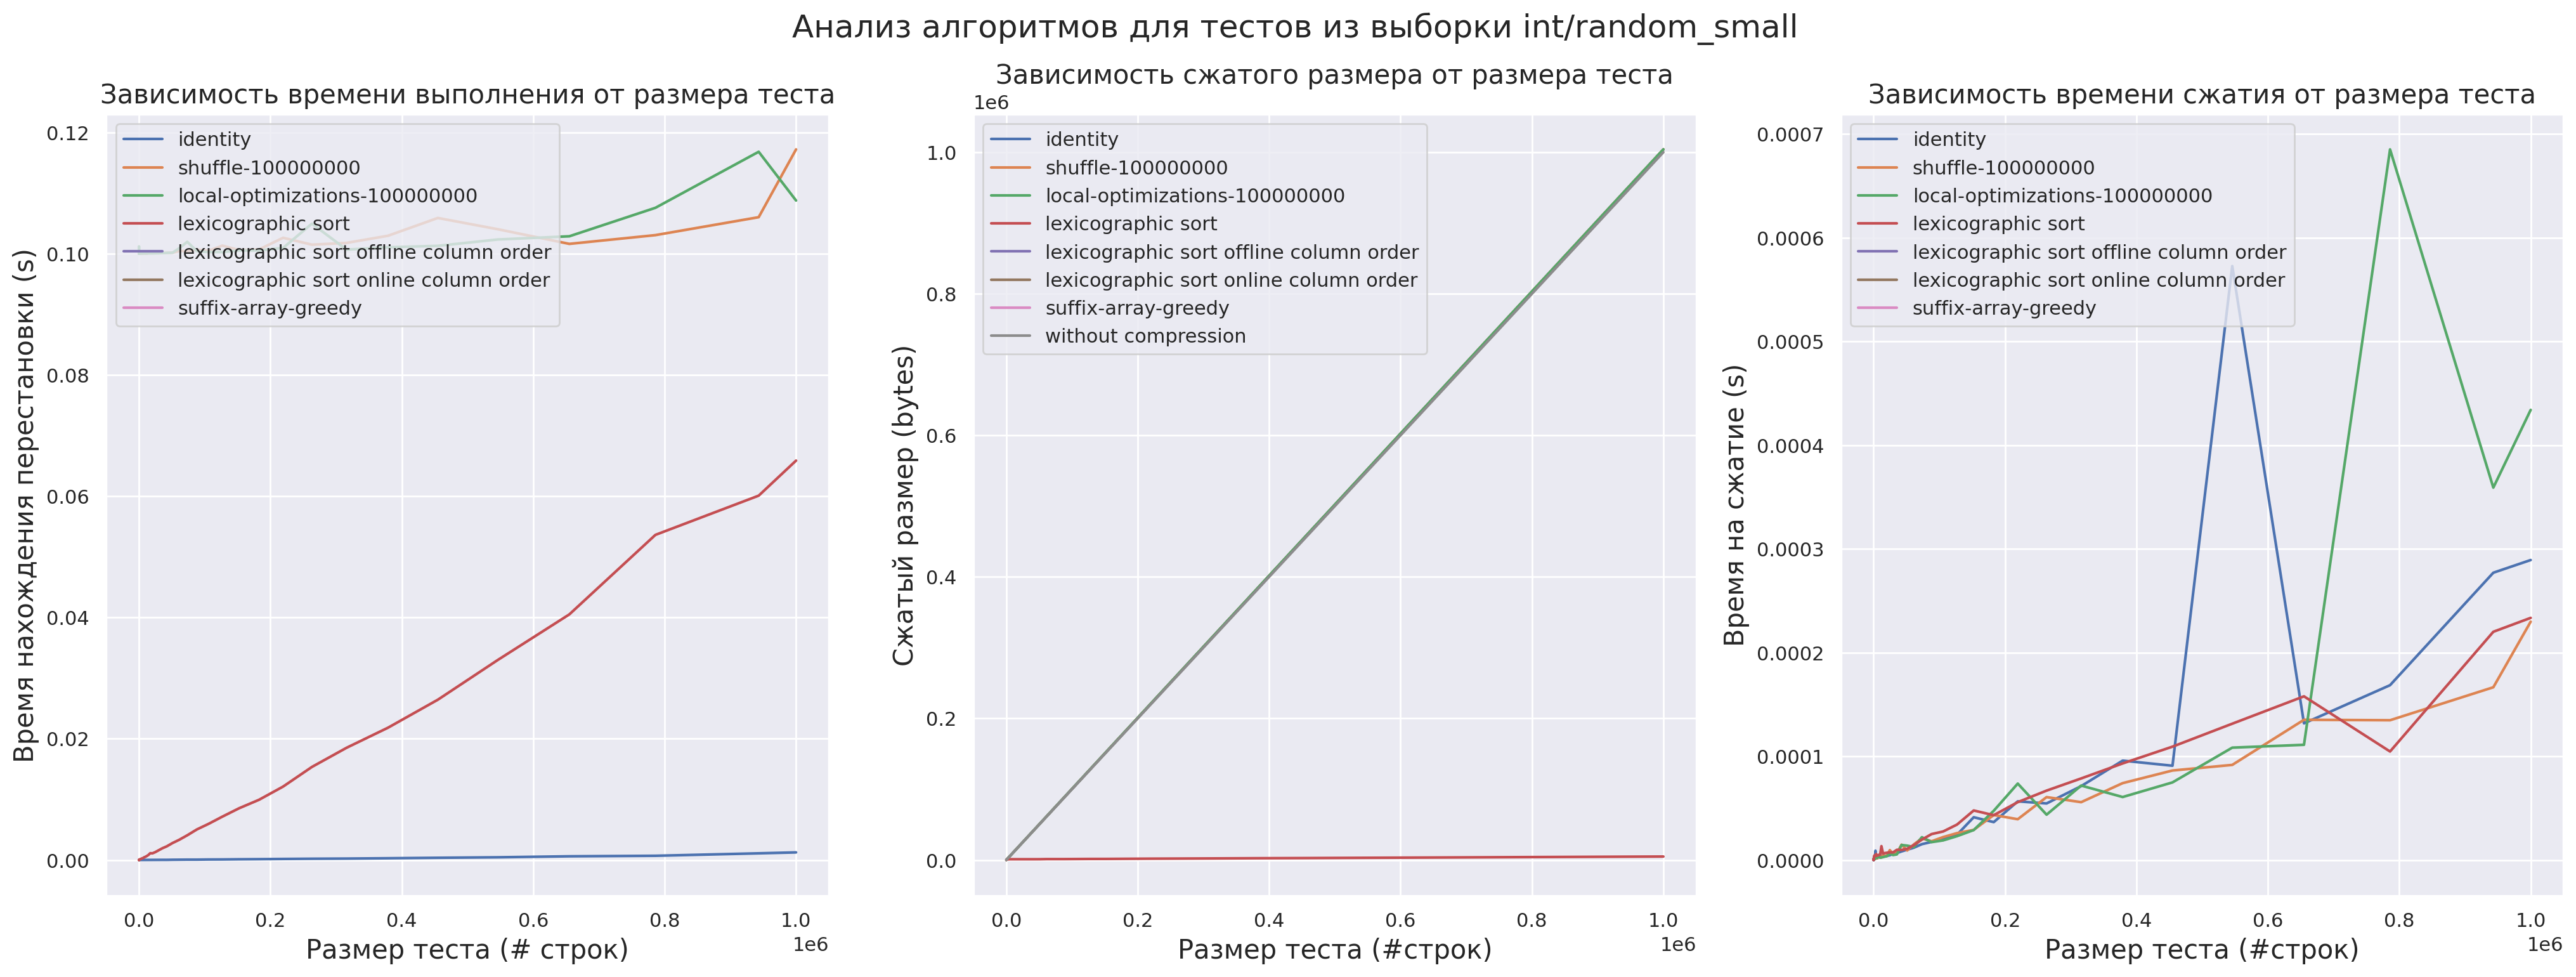

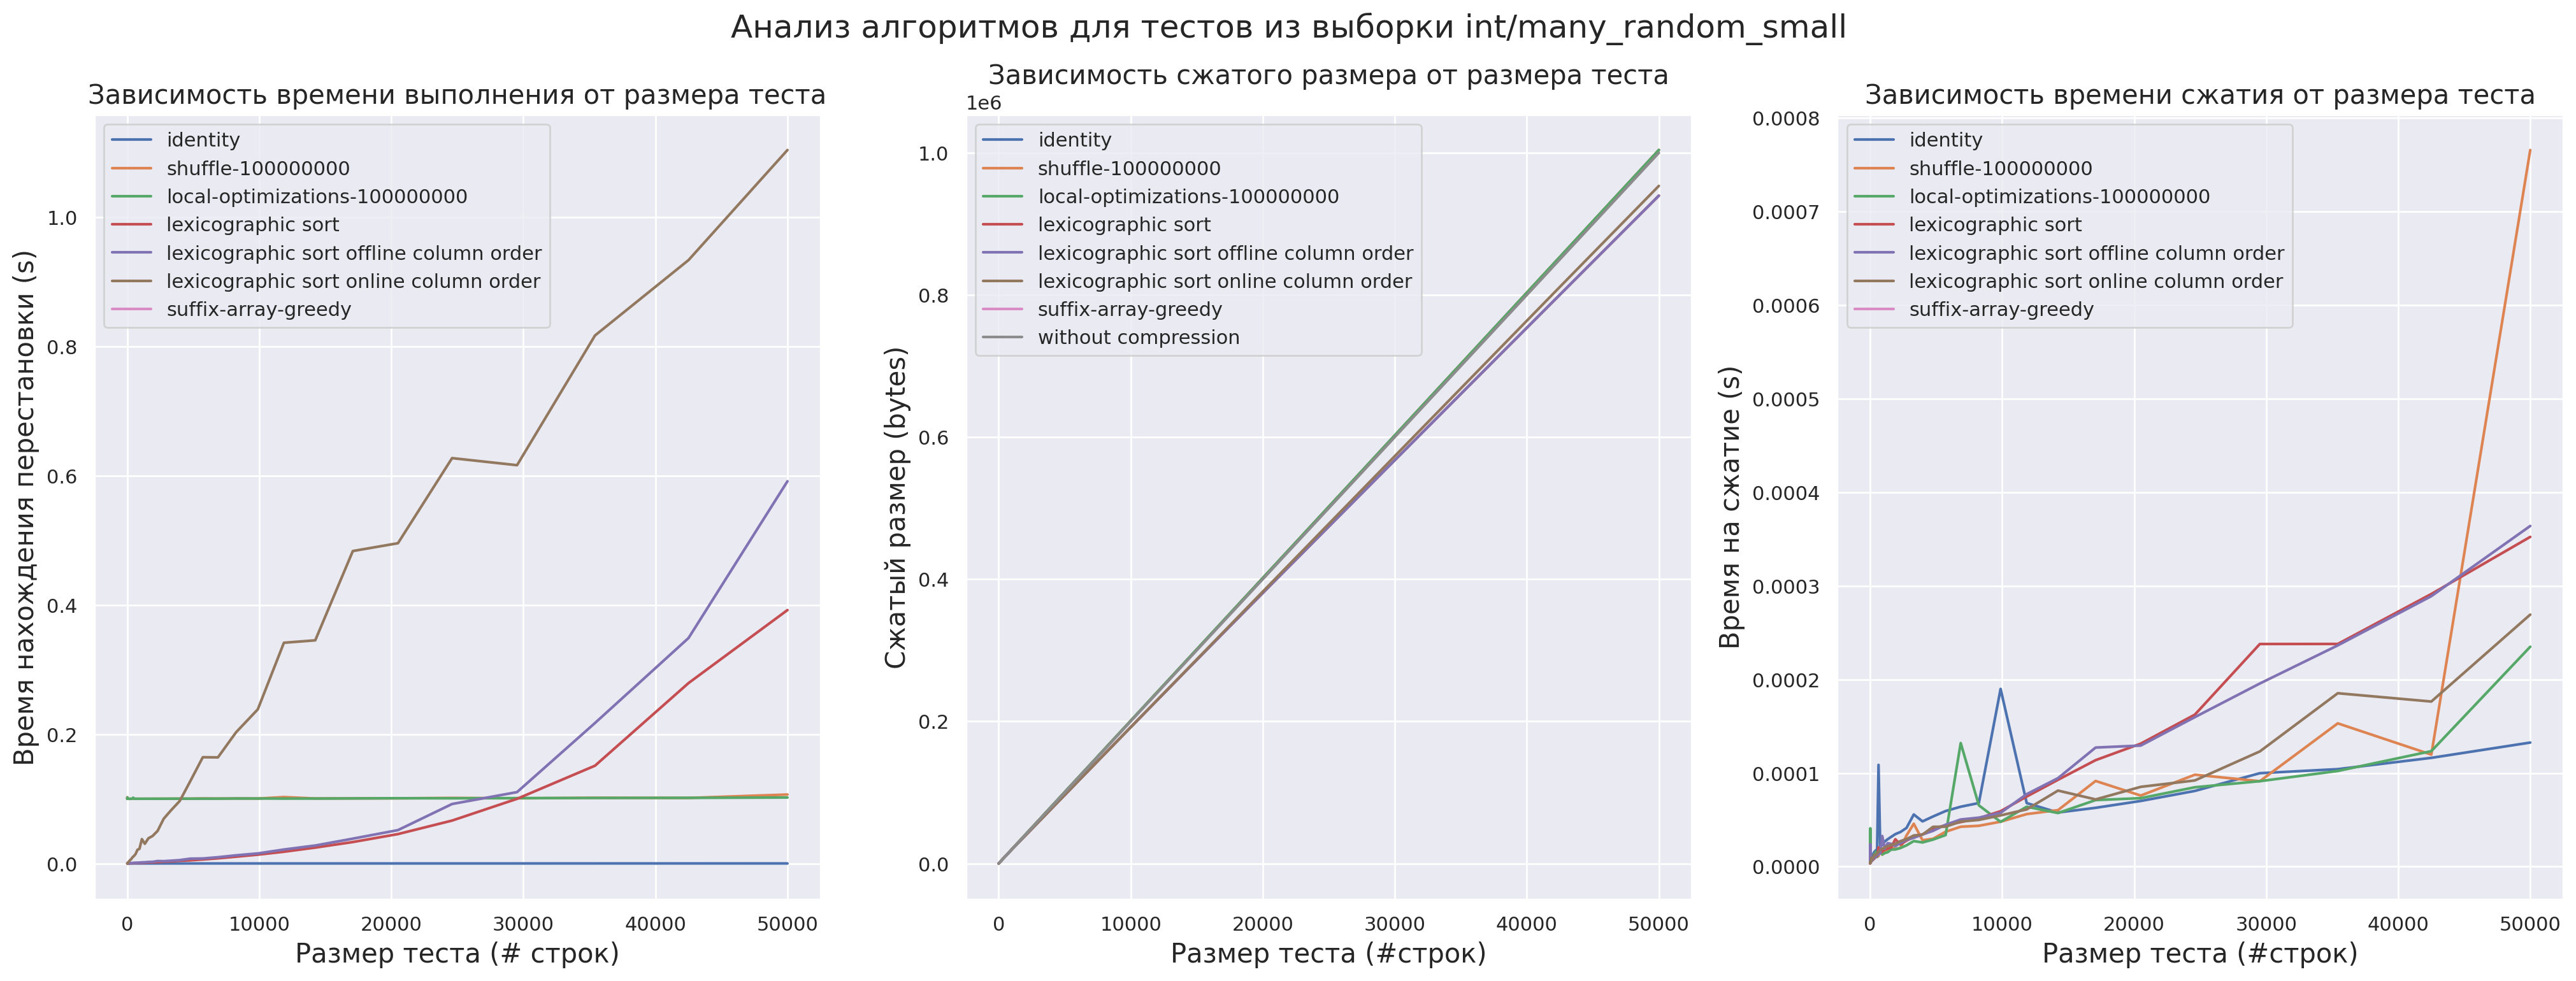

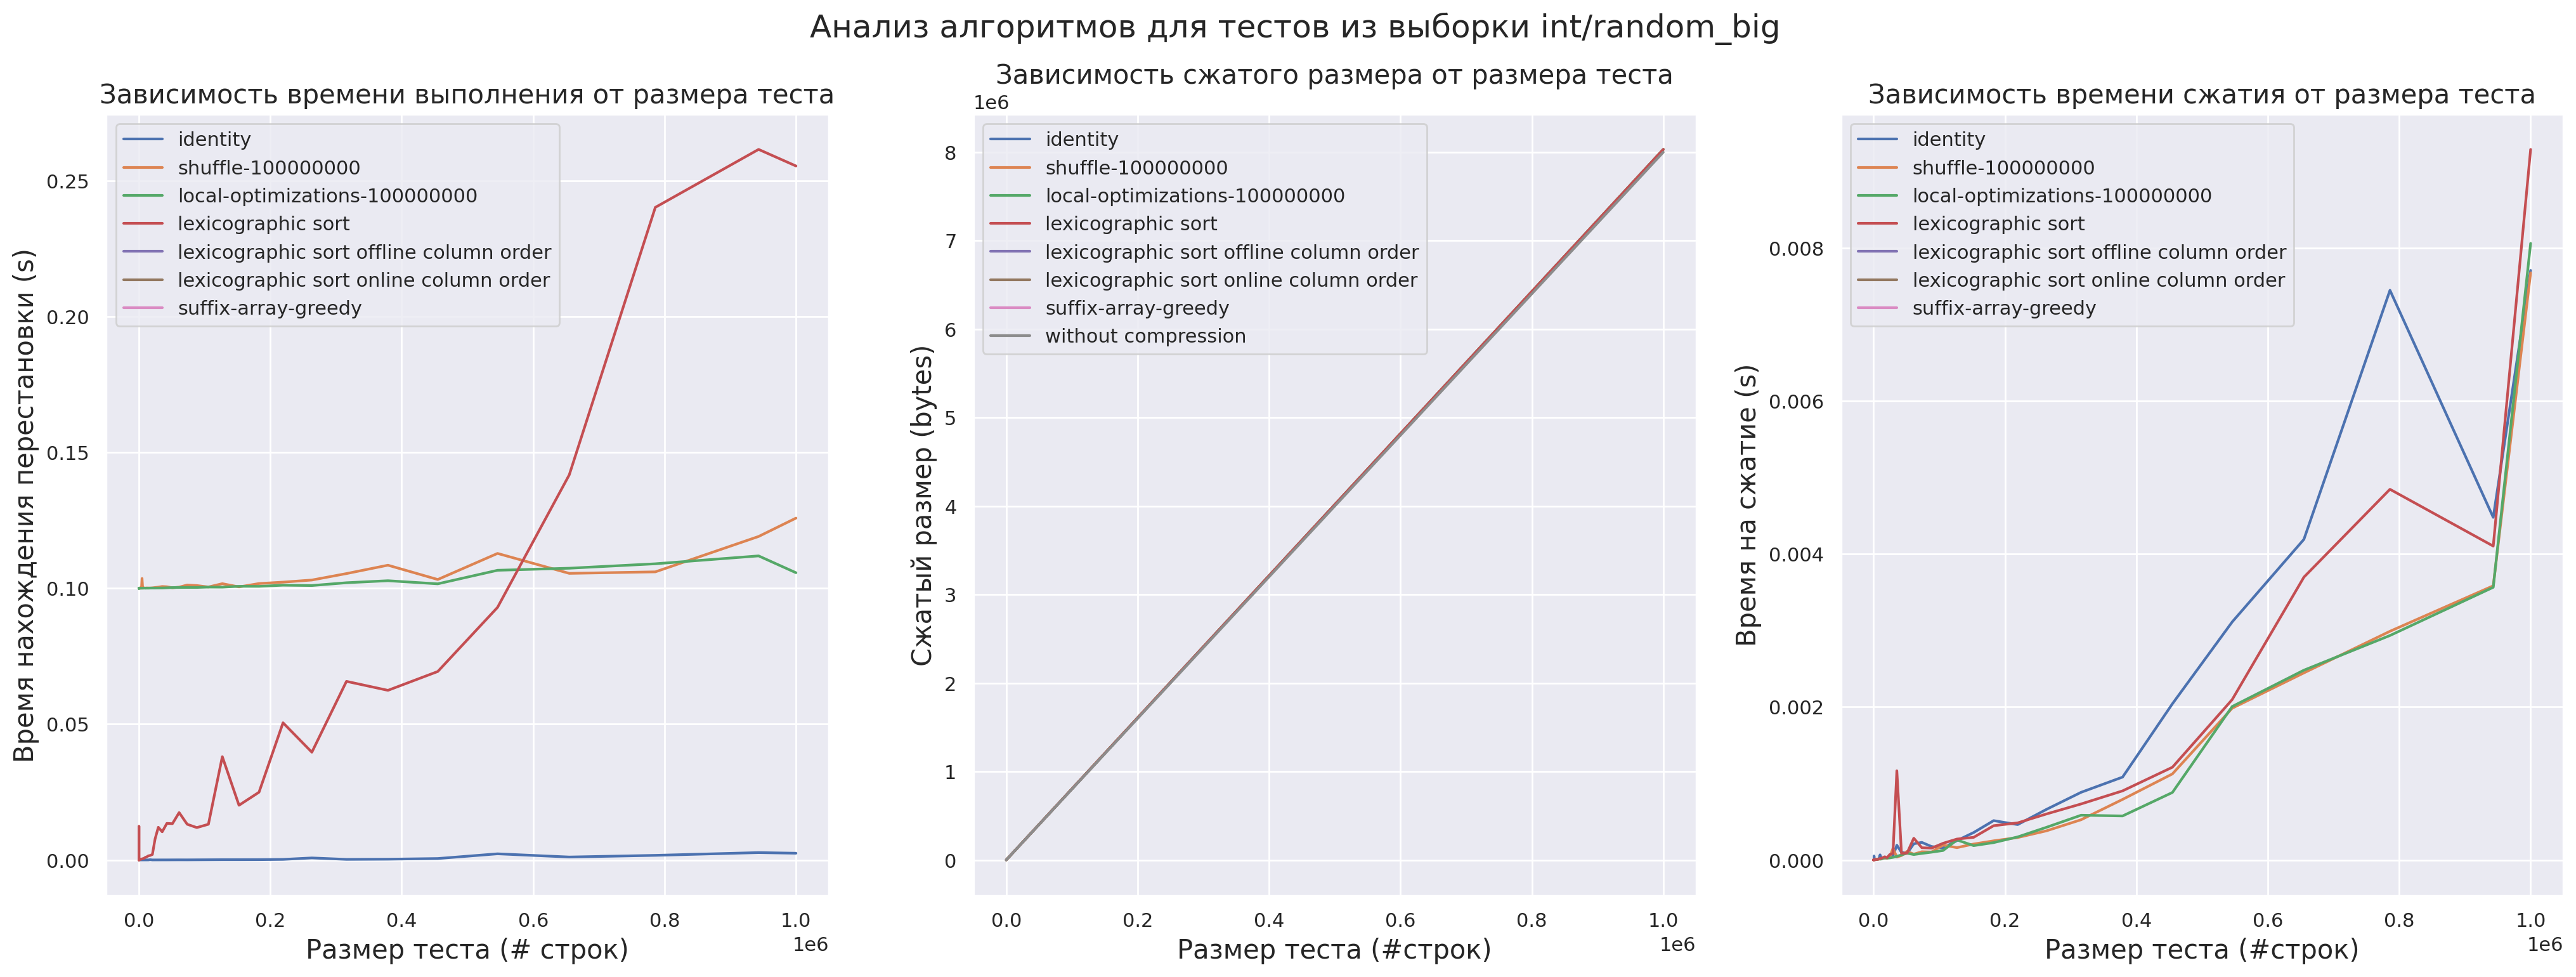

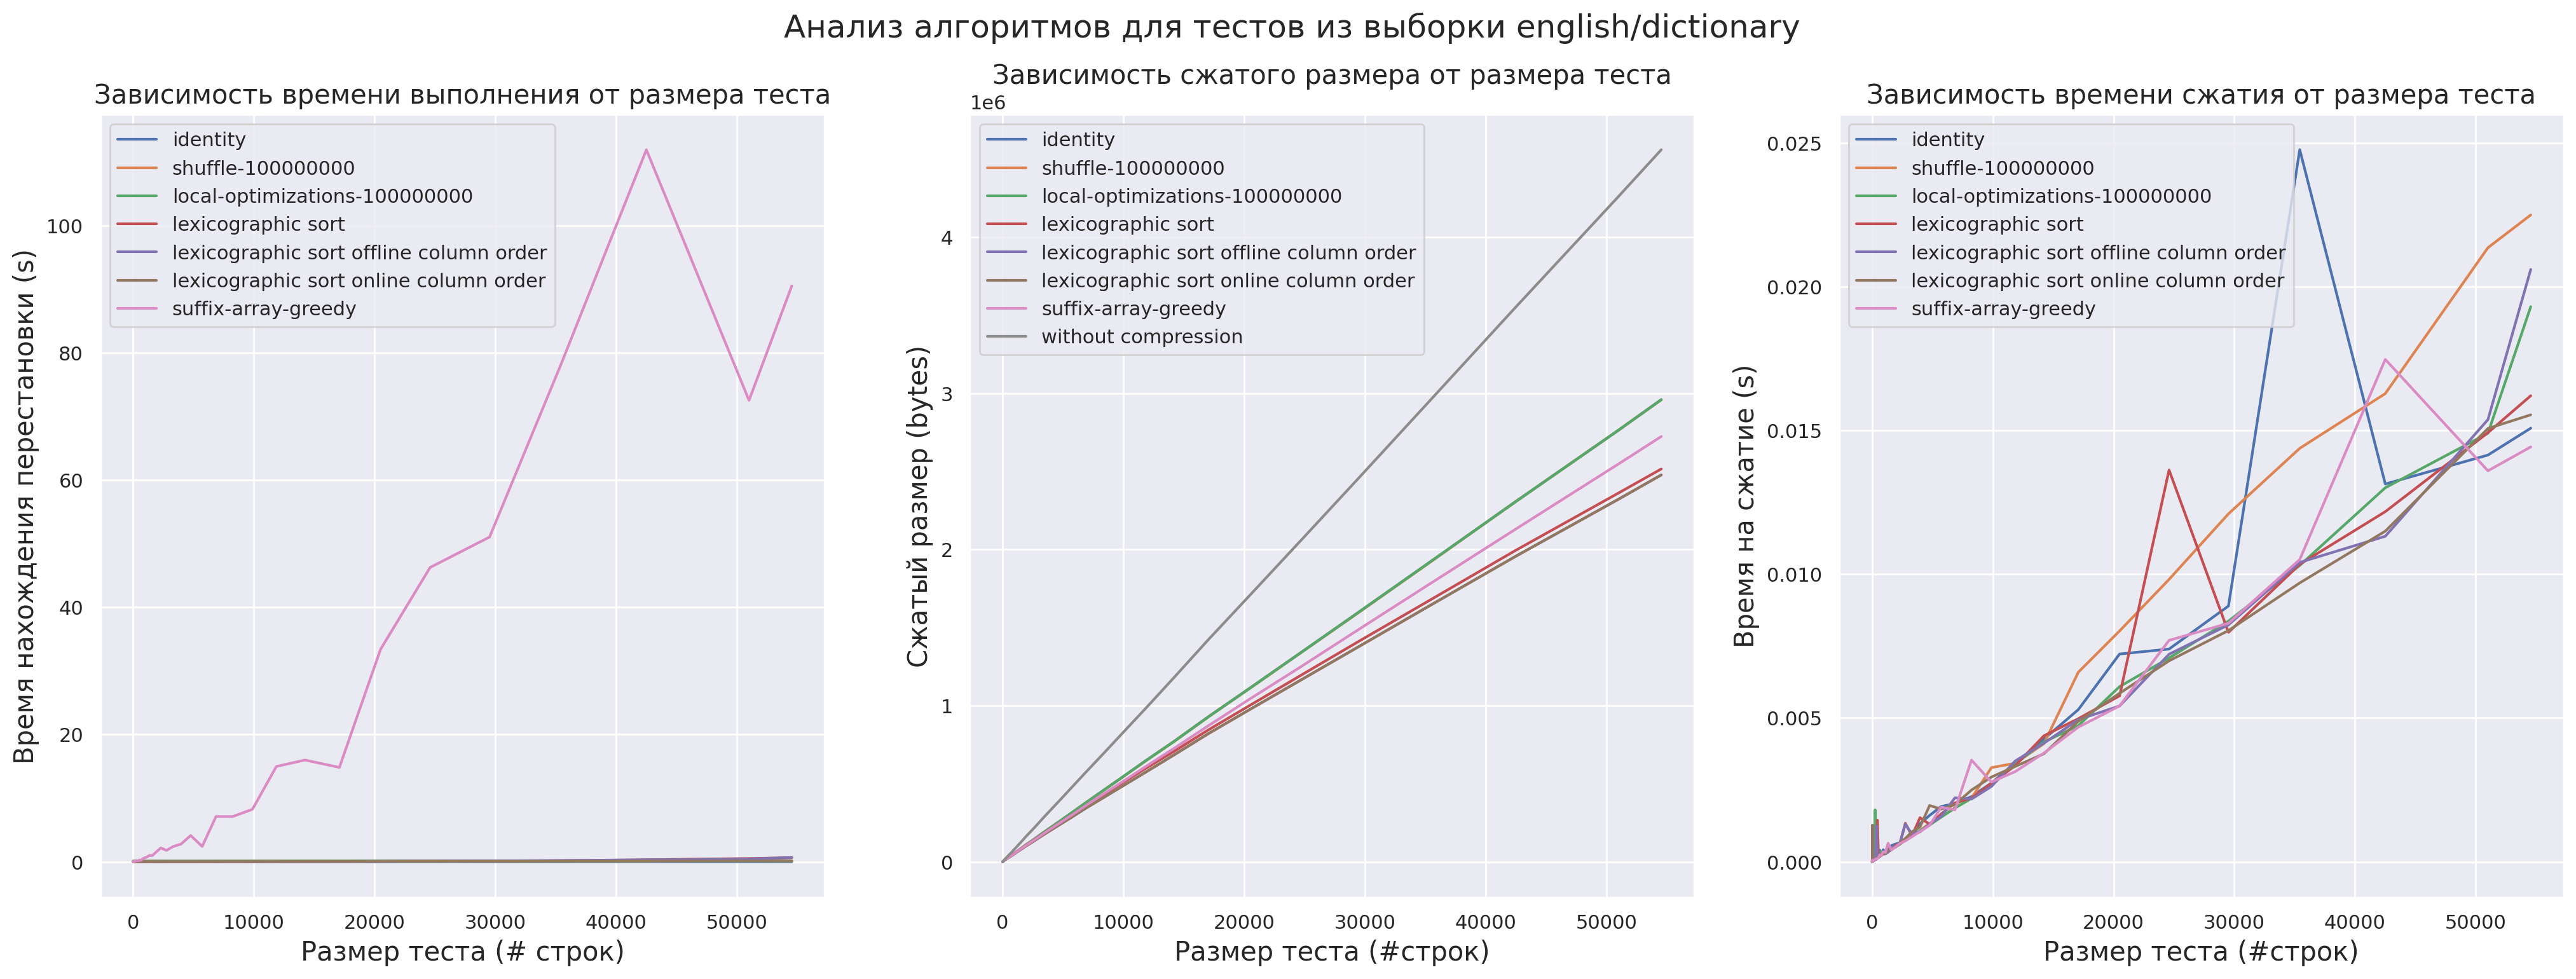

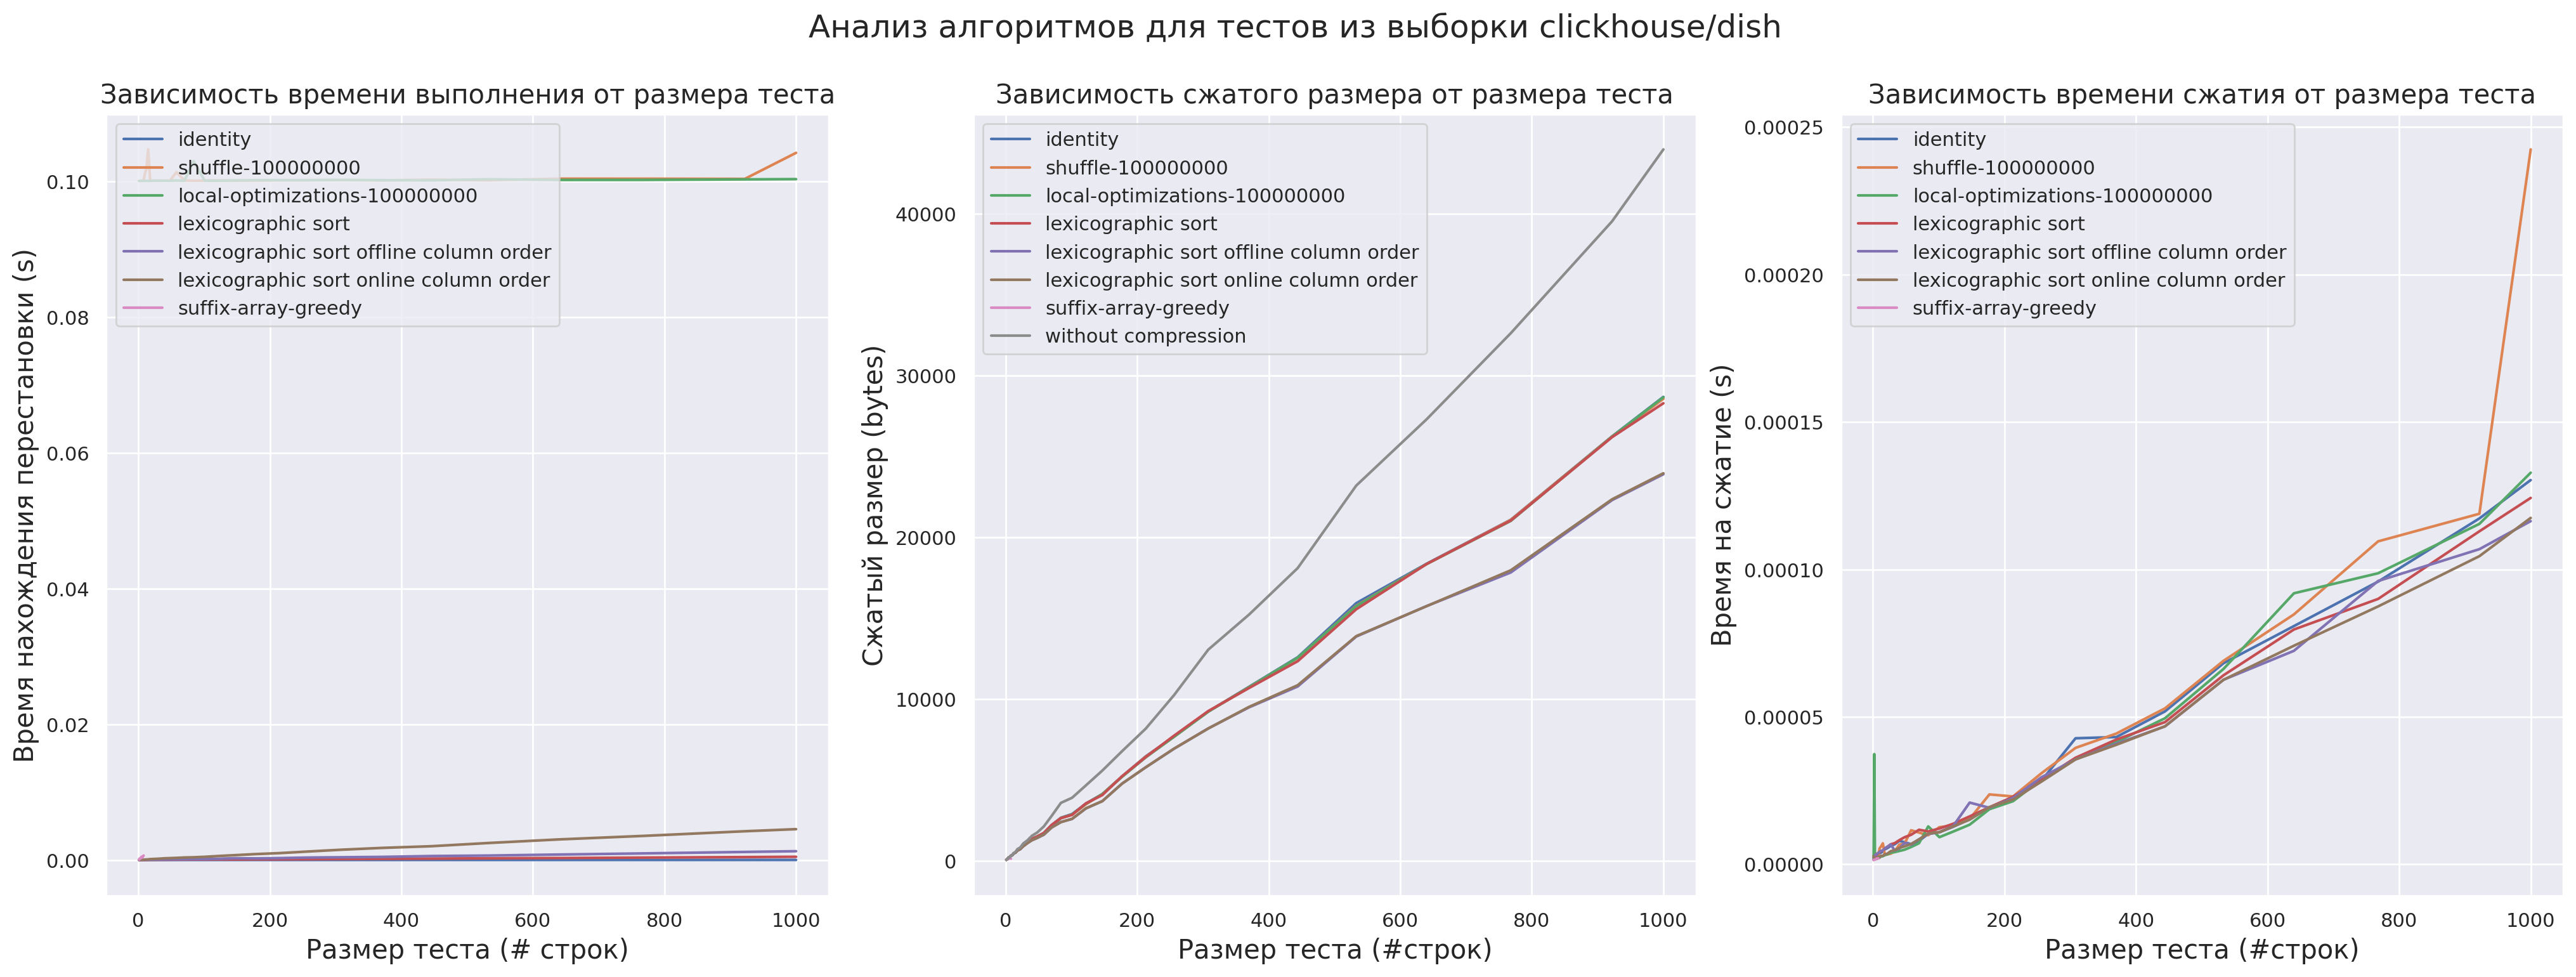

In [9]:
for test_type in tests_types:
    plot_for_test_type_compression_sorts(test_type)


In [10]:
df_clickhouse = pd.read_csv("tests_results/clickhouse_tests.csv")
df_clickhouse = prepare_df(df_clickhouse)
df_clickhouse


name  rows  columns   size  \
0           tests_data/int/random_small/1.csv     1        2    168   
1           tests_data/int/random_small/2.csv     2        2    169   
2           tests_data/int/random_small/3.csv     3        2    170   
3           tests_data/int/random_small/4.csv     4        2    171   
4           tests_data/int/random_small/5.csv     5        2    172   
..                                        ...   ...      ...    ...   
877   tests_data/clickhouse/menu_page/533.csv   533        8  15038   
878   tests_data/clickhouse/menu_page/640.csv   640        8  17072   
879   tests_data/clickhouse/menu_page/768.csv   768        8  21009   
880   tests_data/clickhouse/menu_page/922.csv   922        8  23454   
881  tests_data/clickhouse/menu_page/1000.csv  1000        8  25217   

     use_compression_optimization             test_type  
0                           False      int/random_small  
1                           False      int/random_small  
2                           False      int/random_small  
3                           False      int/random_small  
4                           False      int/random_small  
..                            ...                   ...  
877                          True  clickhouse/menu_page  
878                          True  clickhouse/menu_page  
879                          True  clickhouse/menu_page  
880                          True  clickhouse/menu_page  
881                          True  clickhouse/menu_page  

[882 rows x 6 columns]

In [11]:
tests_types = df_clickhouse["test_type"].unique()
tests_types


array(['int/random_small', 'int/random_big', 'int/many_random_small',
       'english/dictionary', 'clickhouse/price_paid_transaction_data',
       'clickhouse/dish', 'clickhouse/menu', 'clickhouse/menu_item',
       'clickhouse/menu_page'], dtype=object)

In [12]:
def plot_for_test_type_clickhouse(test_type):
    plt.ion()
    plt.figure(figsize=(8, 5))
    plt.suptitle(f'Анализ эффективности сжатия в cickhouse для тестов из выборки {test_type}', fontsize=12)
    
    for use_compression_optimization in [True, False]:
        subset = df_clickhouse[(df_clickhouse["test_type"] == test_type) & (df_clickhouse["use_compression_optimization"] == use_compression_optimization)]
        plt.plot(subset['rows'], subset['size'], label=f"optimize={use_compression_optimization}")

    plt.legend(loc='upper left')
    plt.xlabel('Размер теста (#строк)', fontsize = 10)
    plt.ylabel('Размер (bytes)', fontsize = 10)

    plt.show()


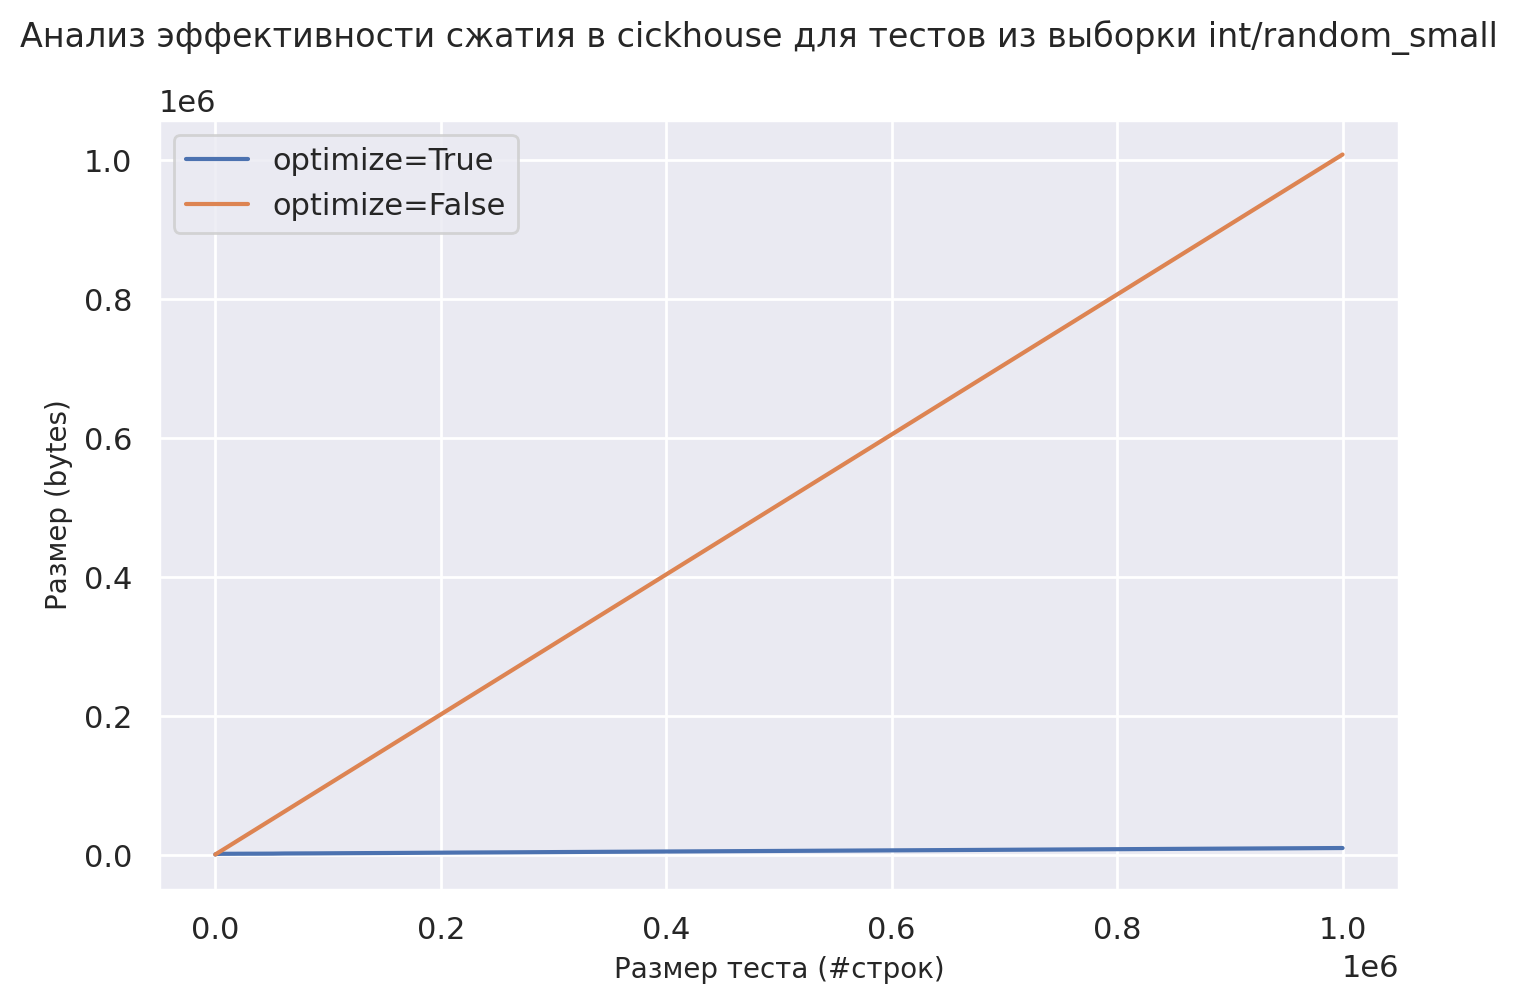

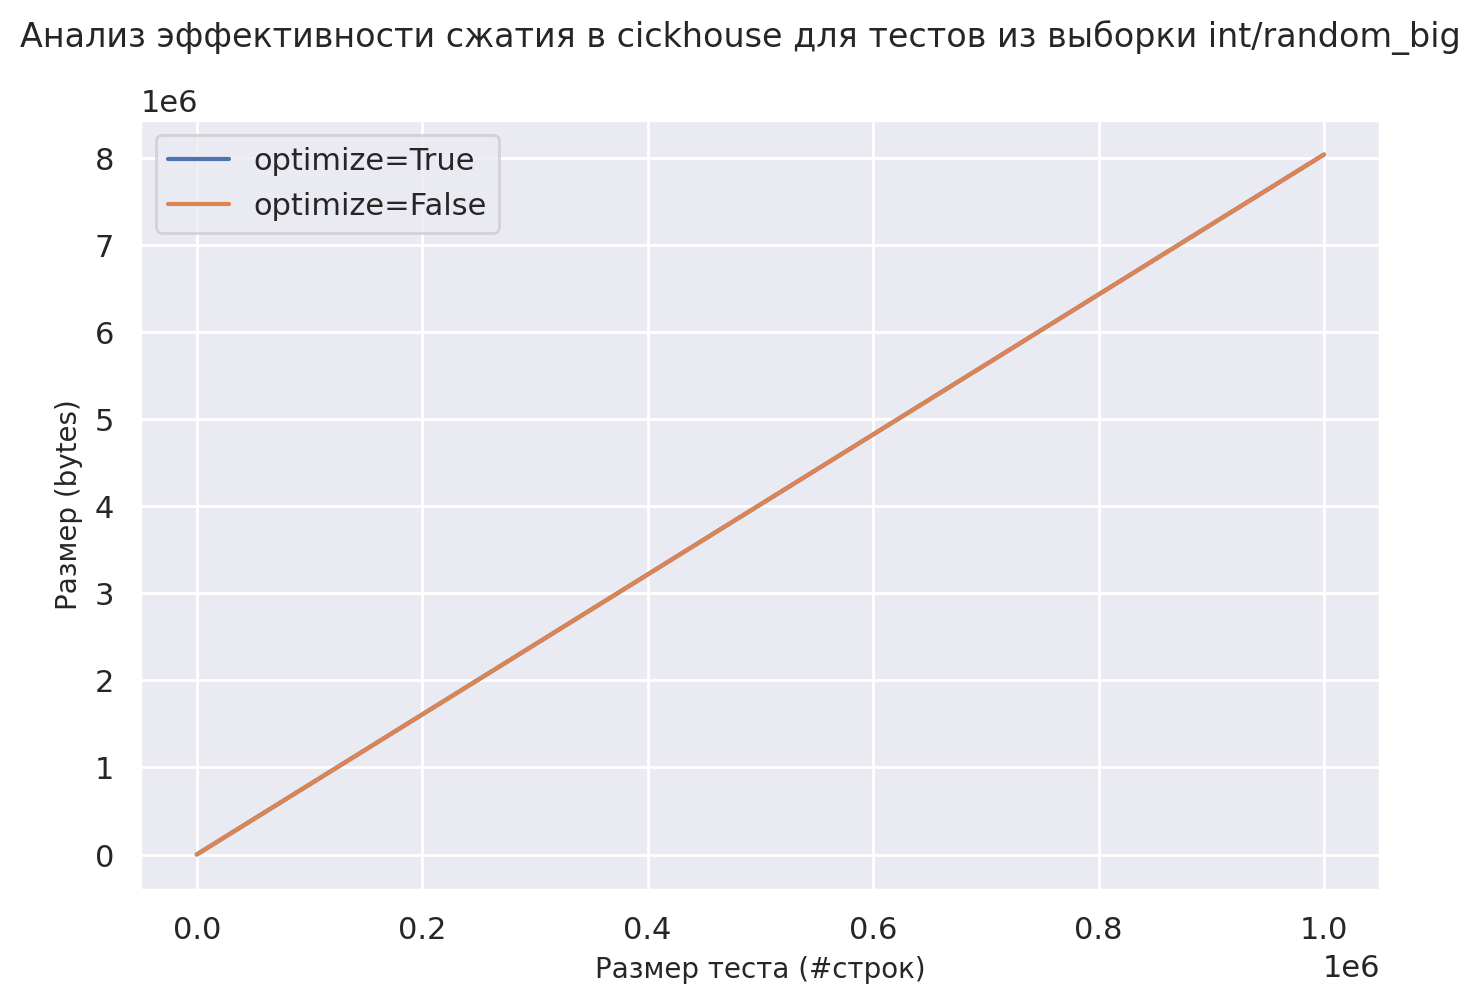

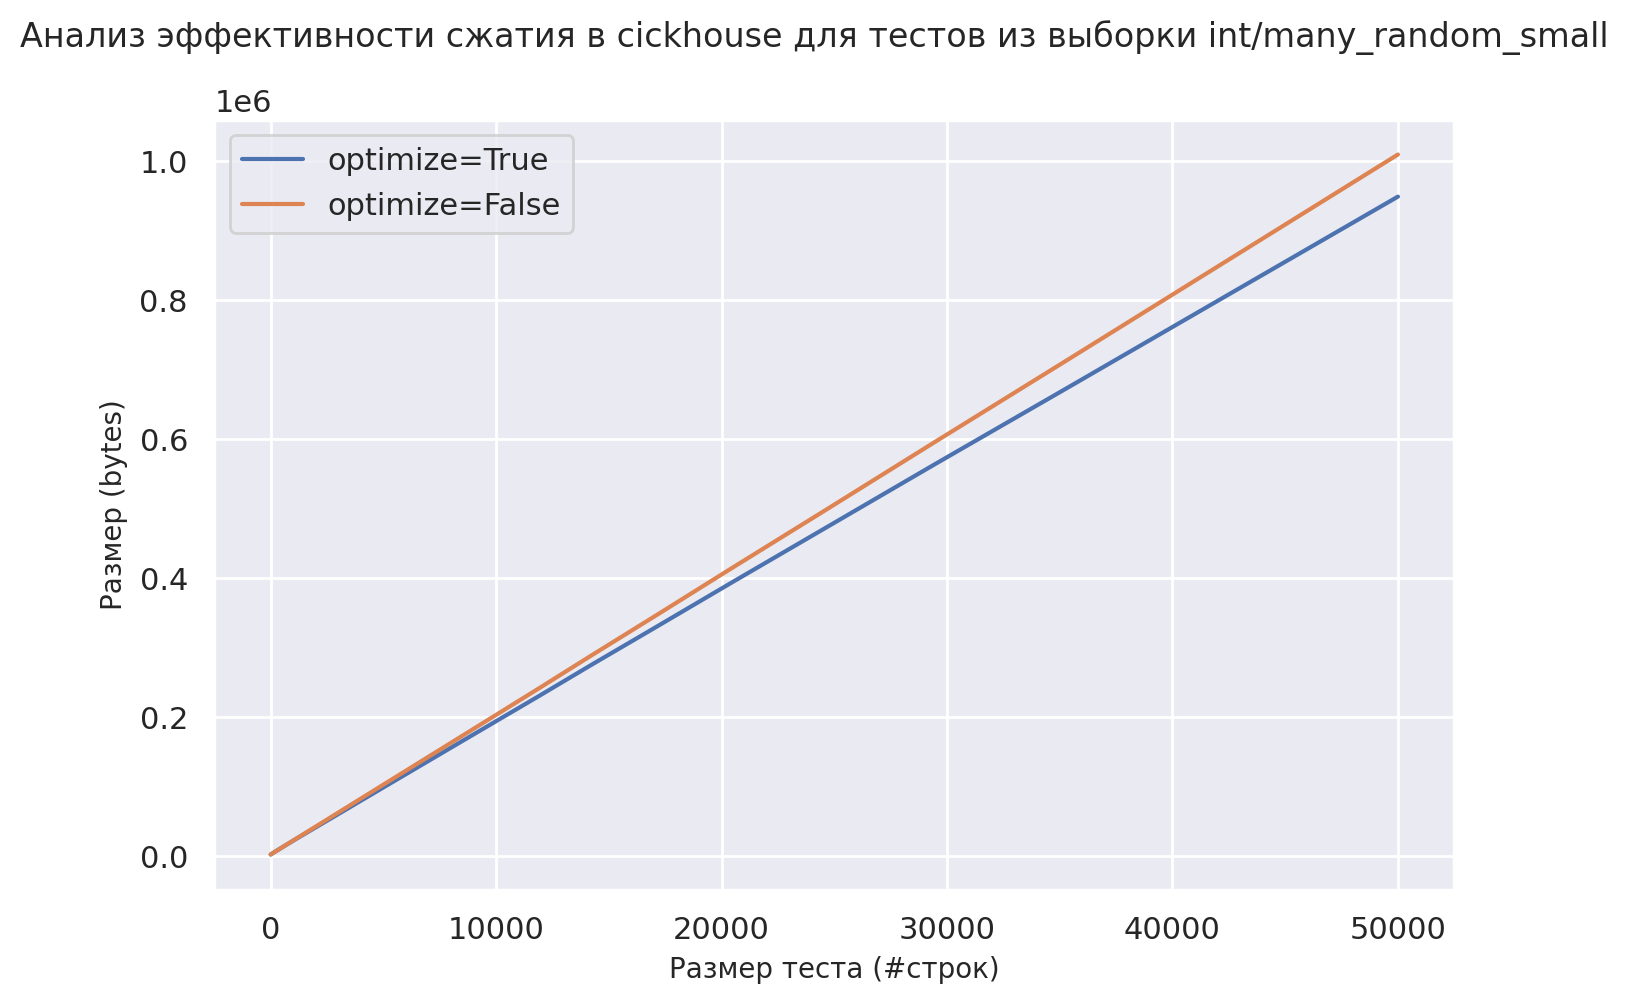

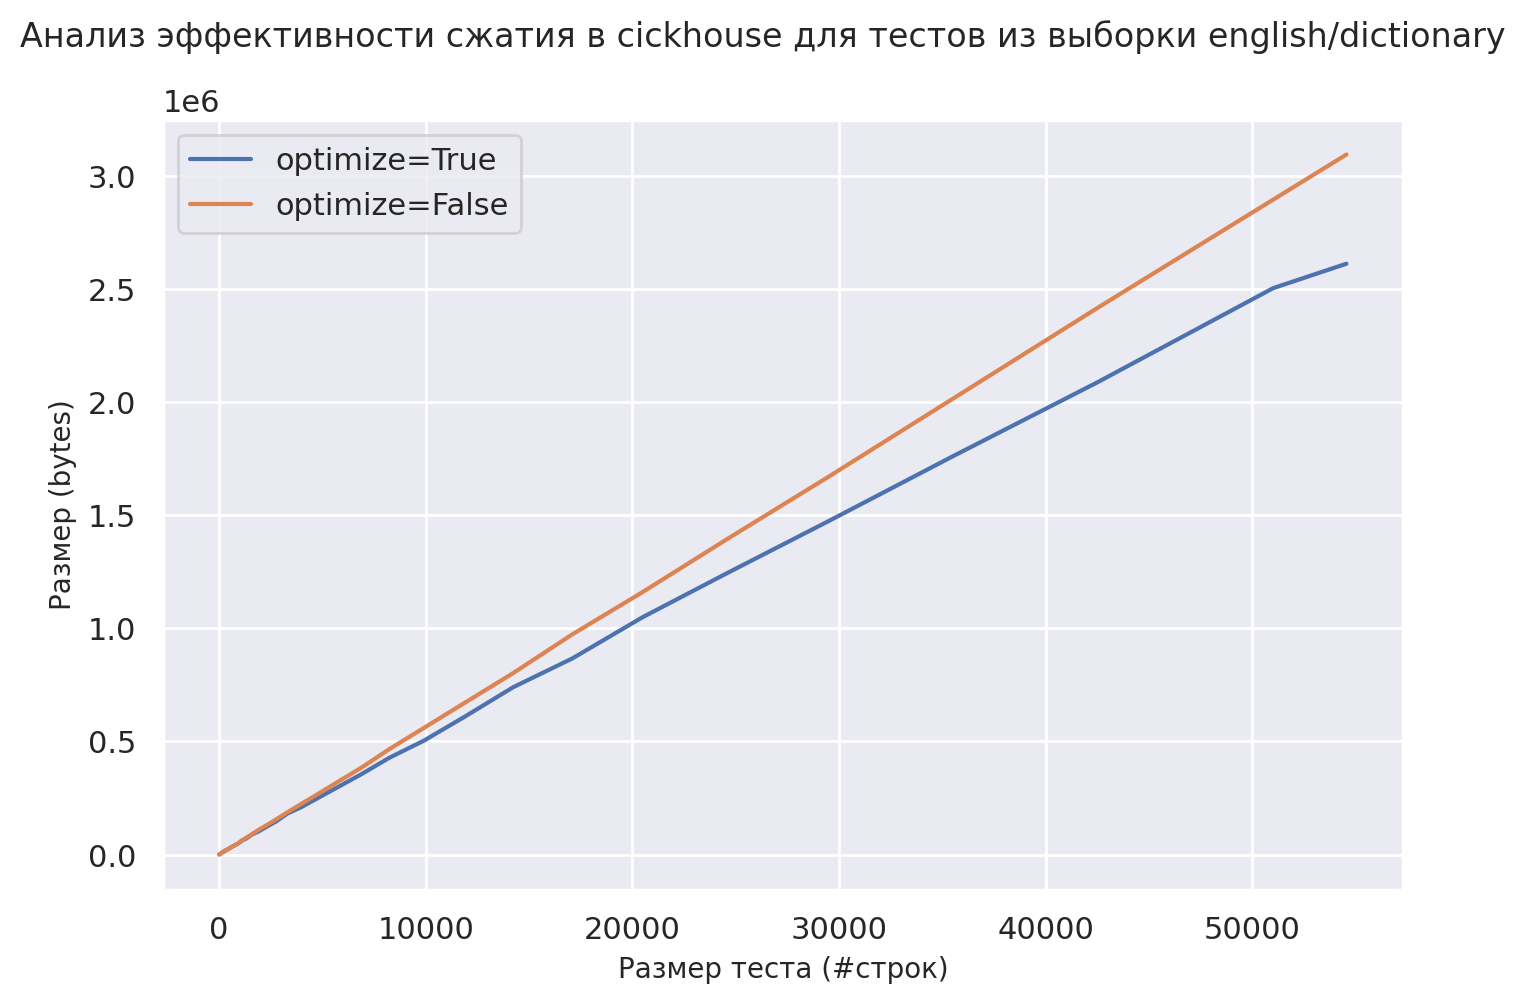

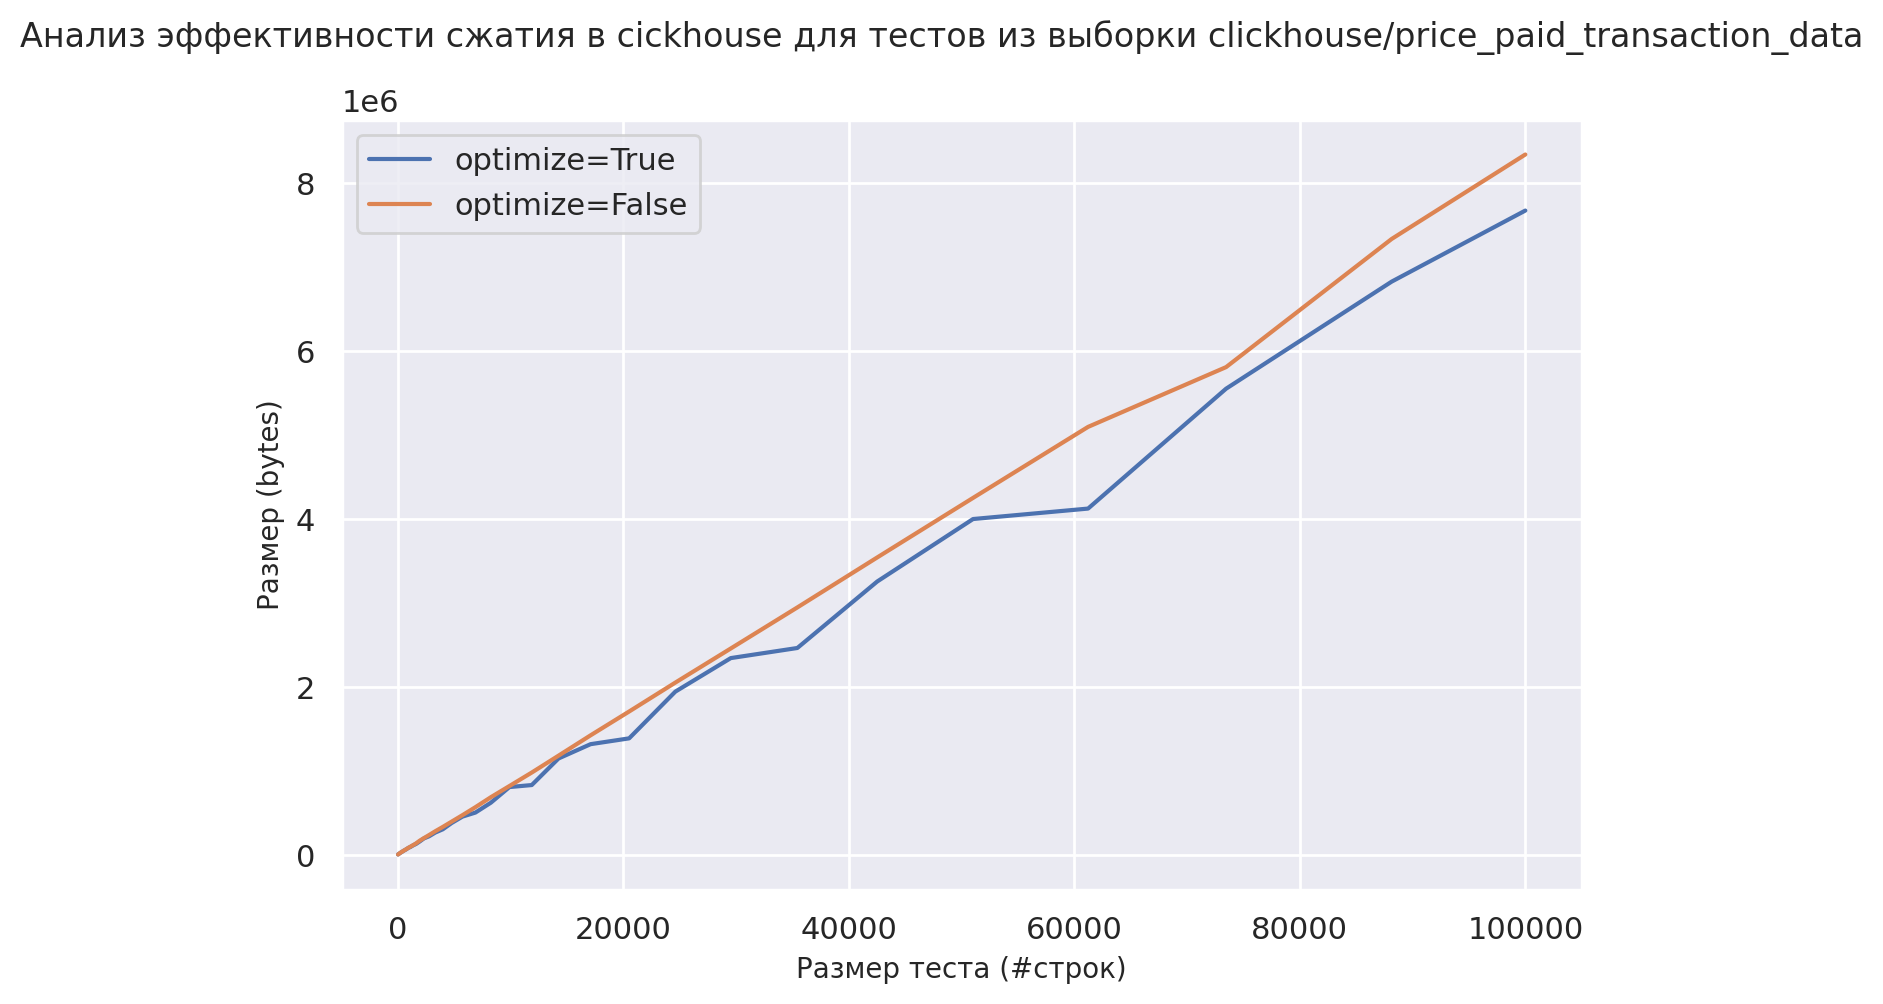

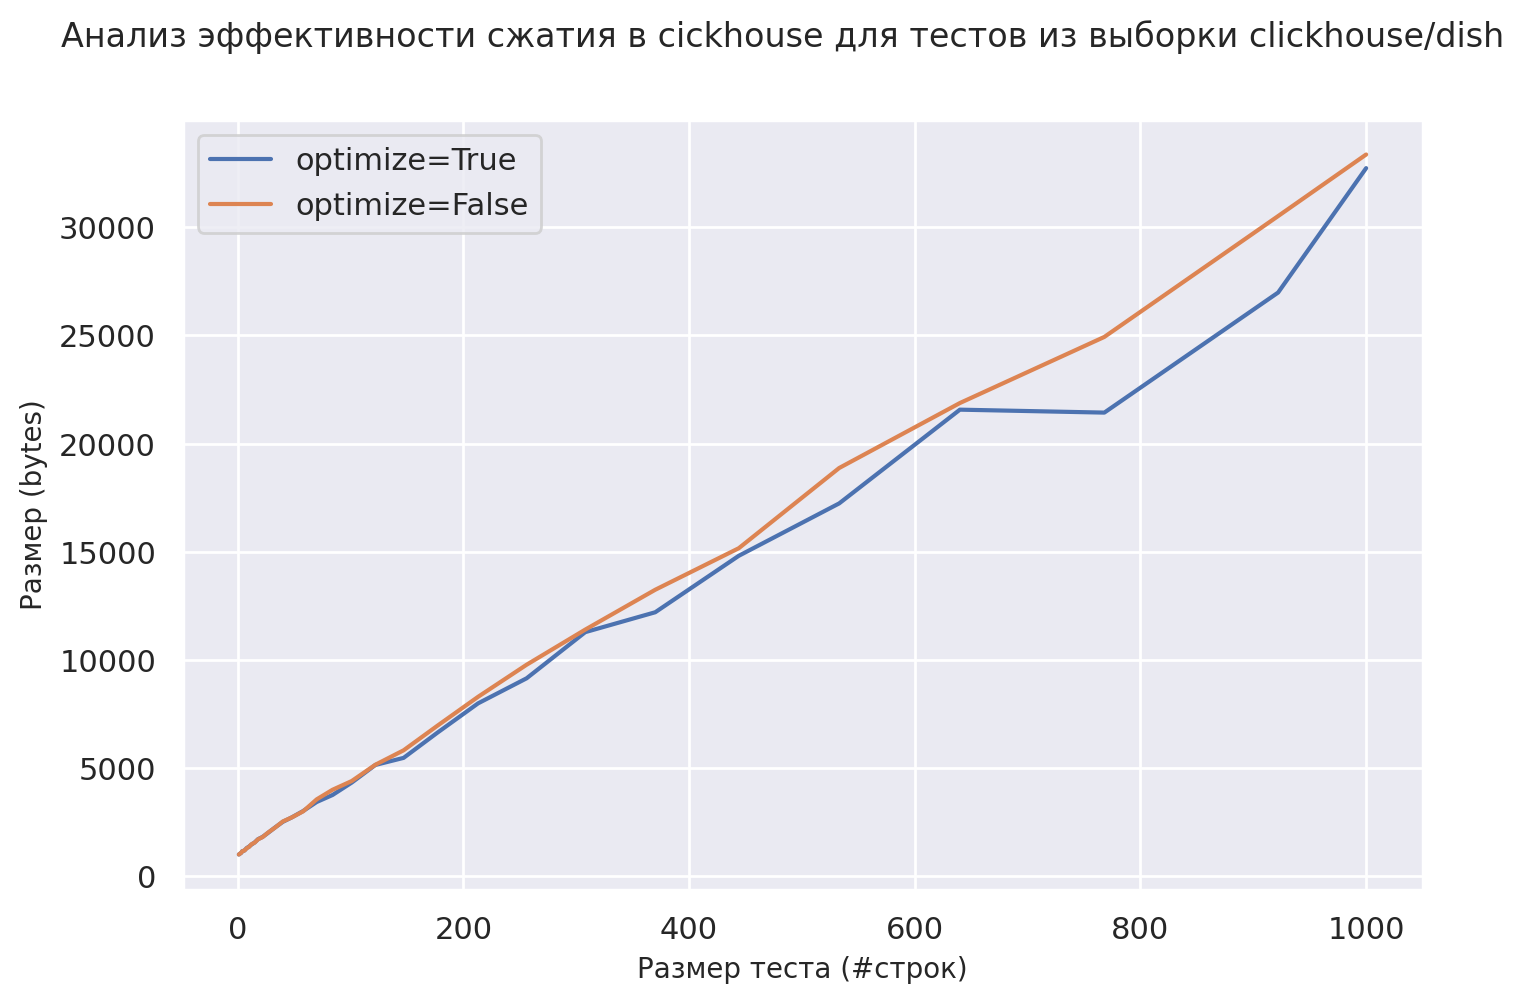

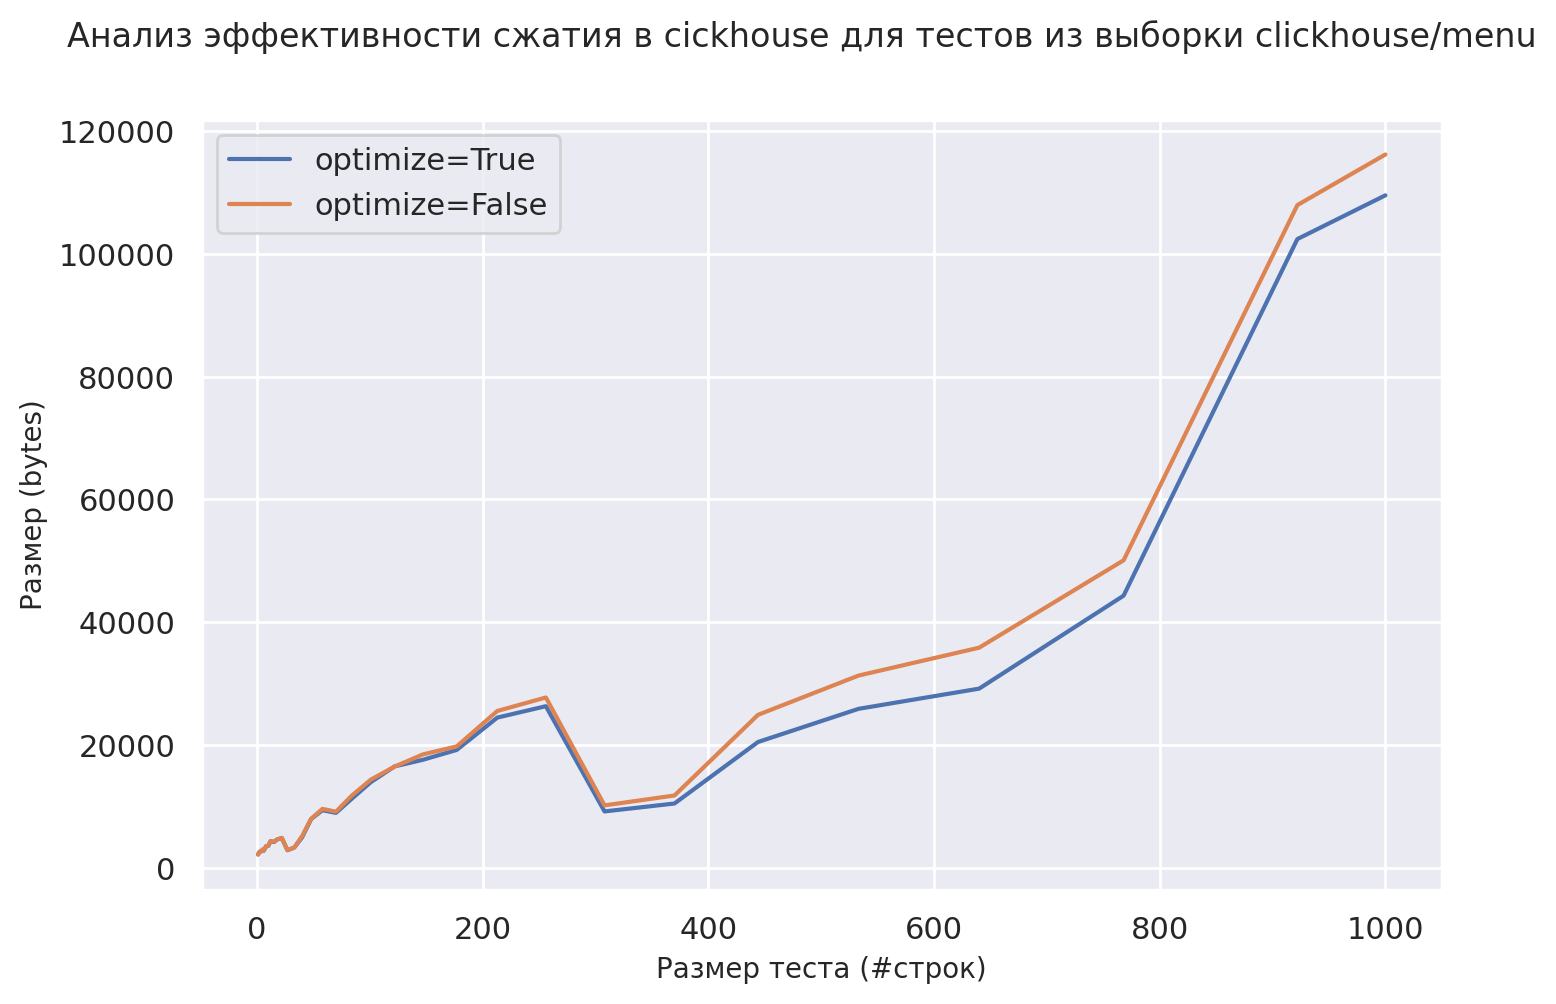

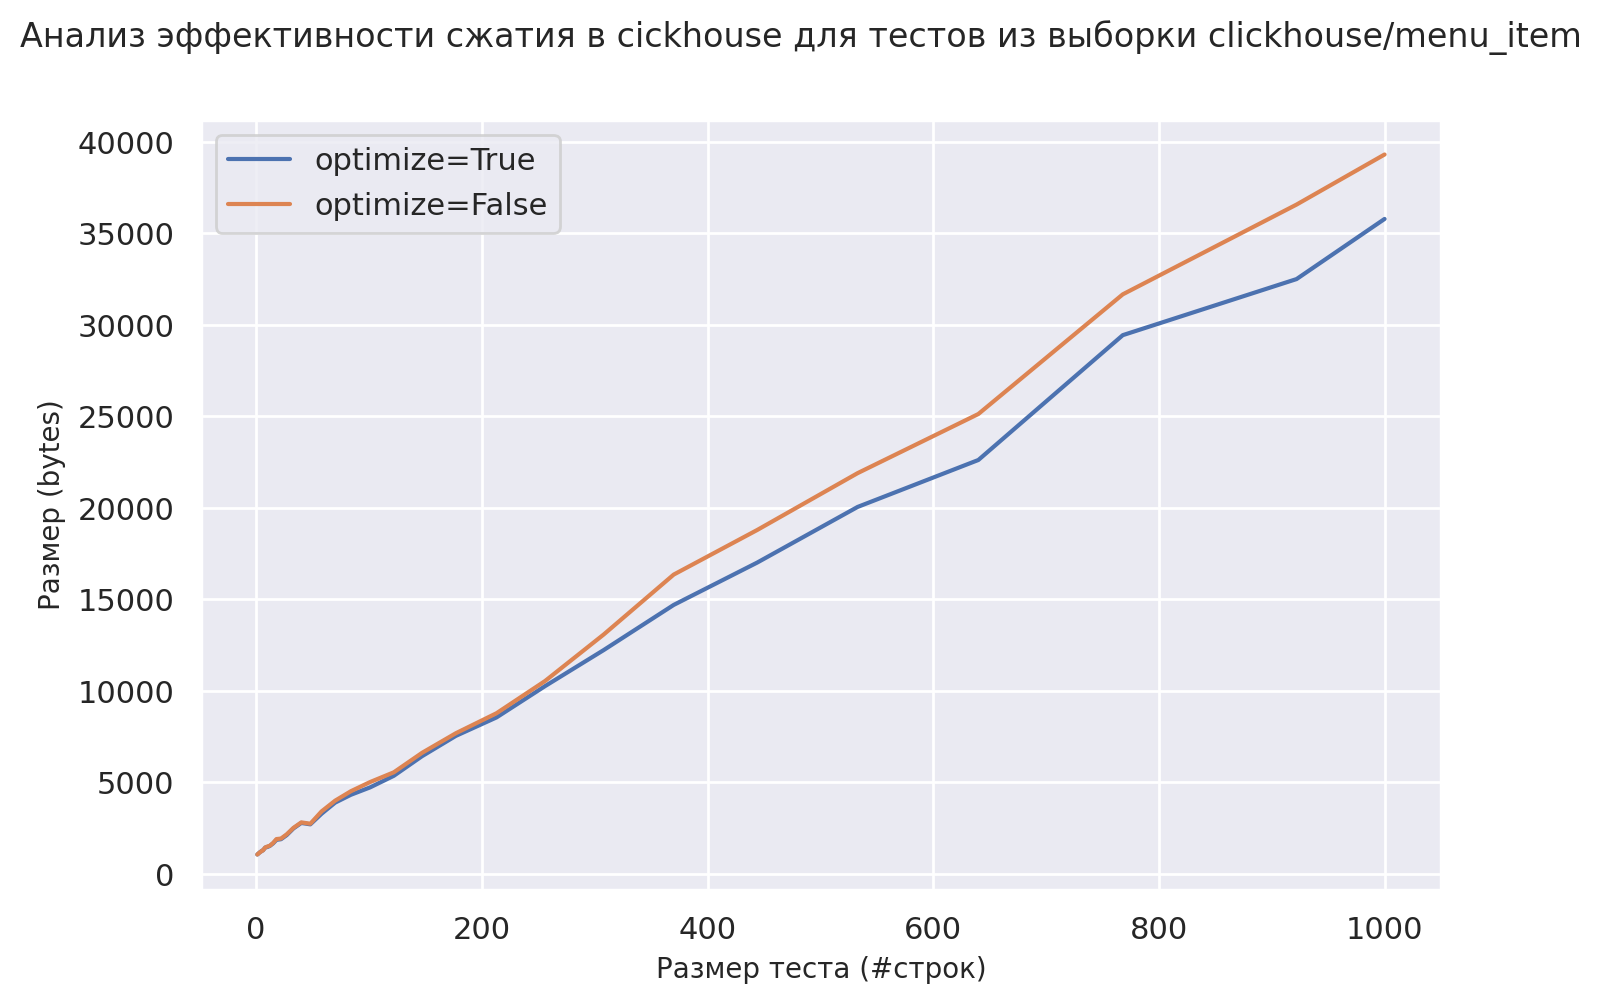

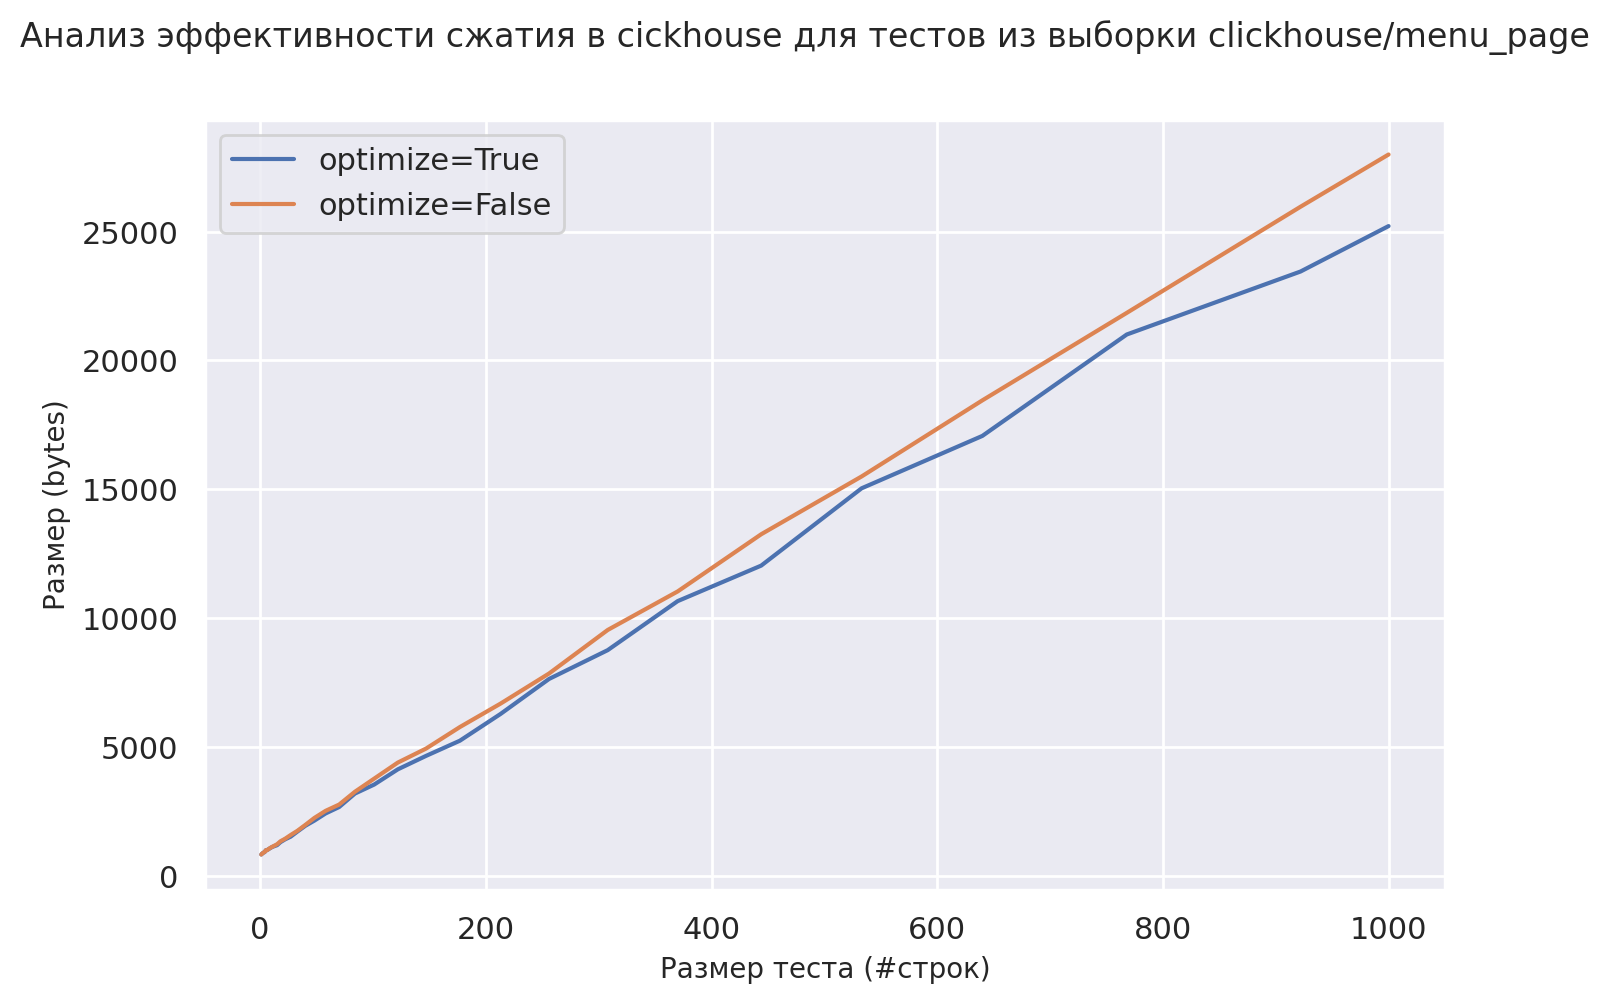

In [14]:
for test_type in tests_types:
    plot_for_test_type_clickhouse(test_type)
